In [8]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy import stats
import matplotlib.pyplot as plt


%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

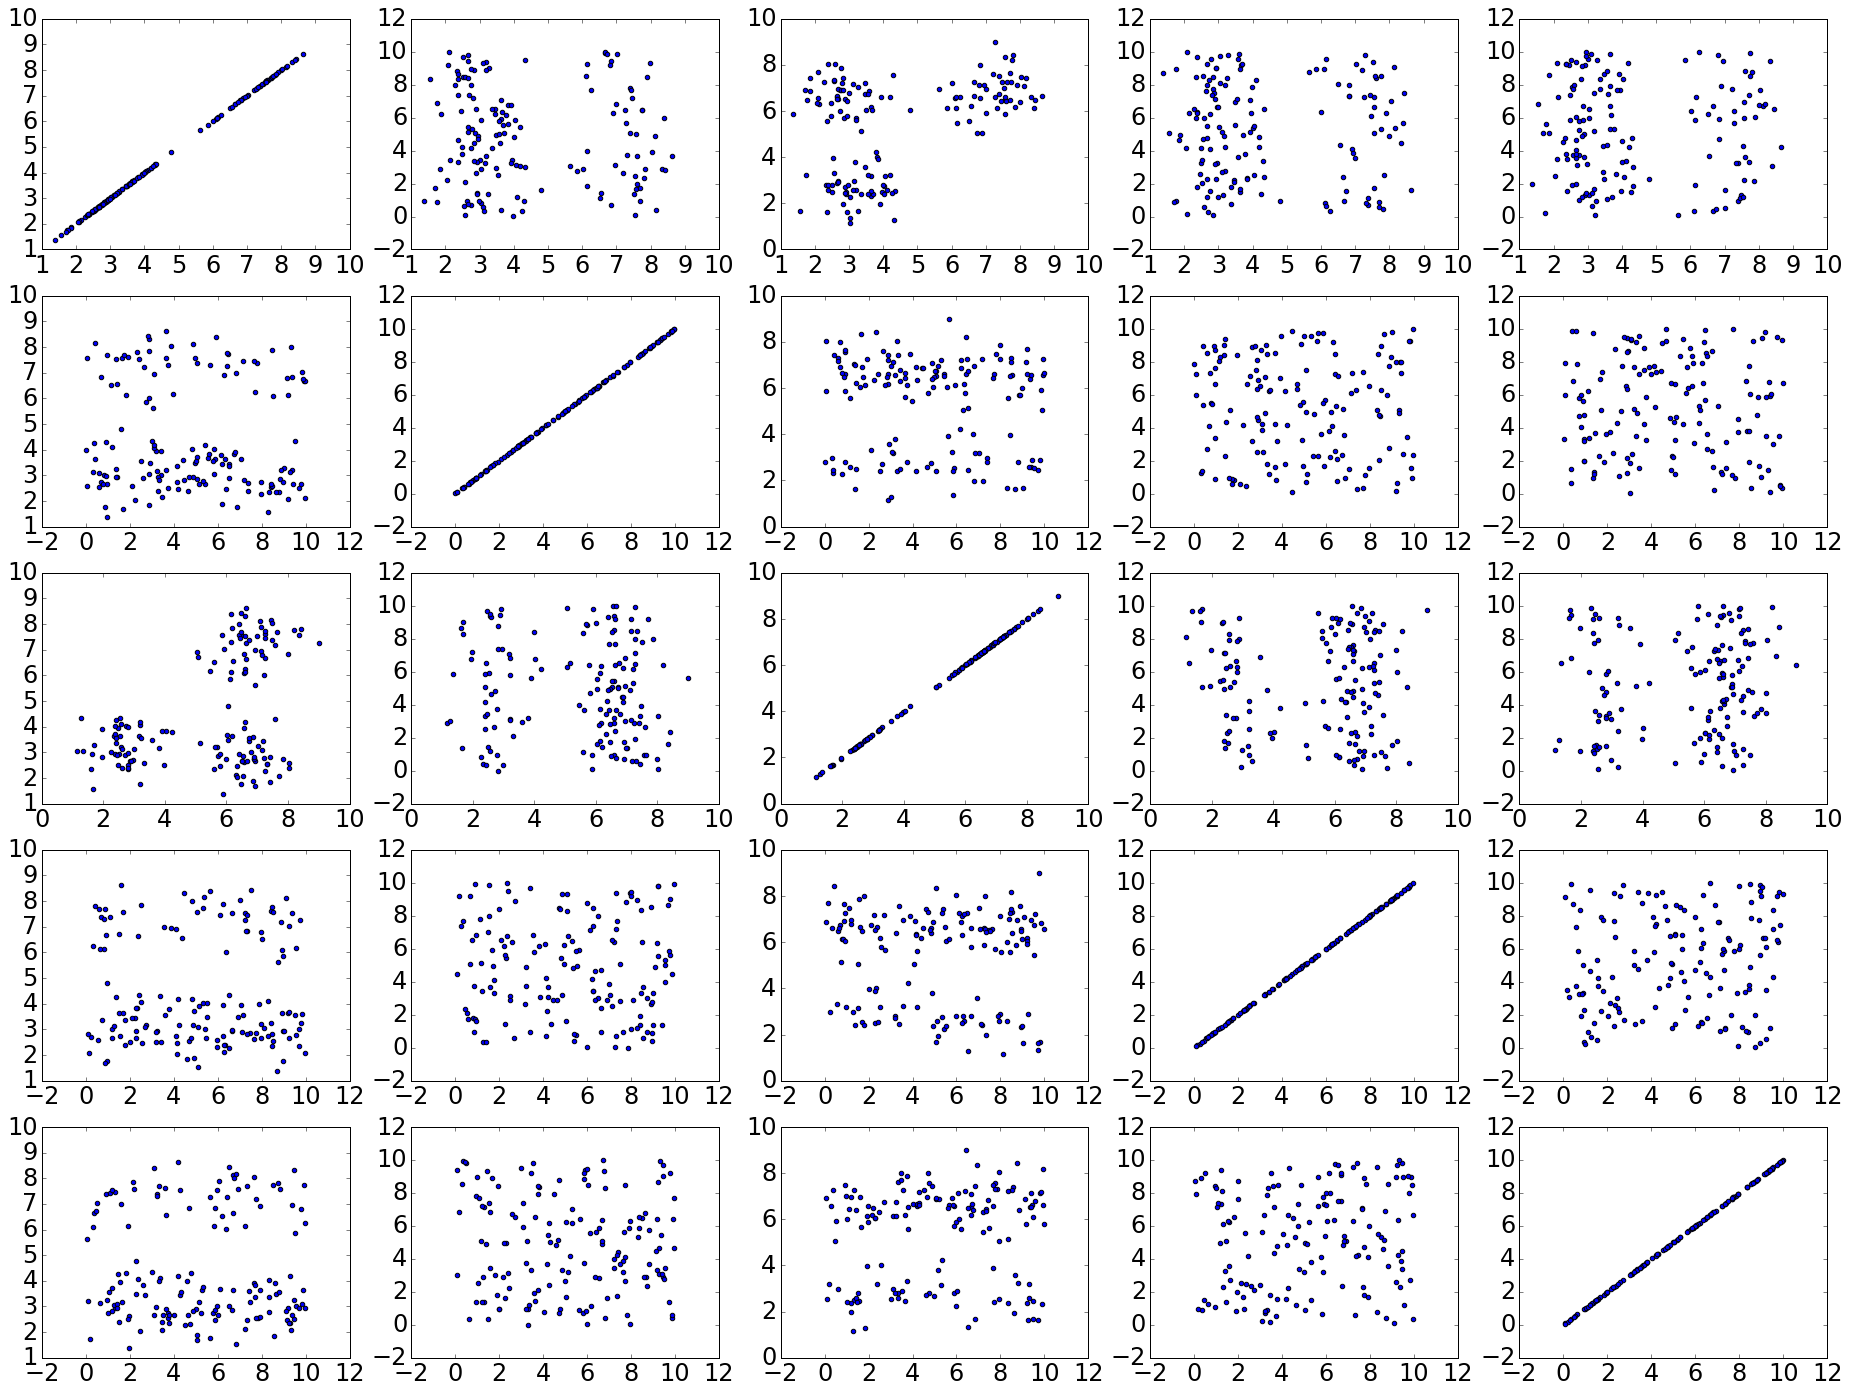

In [9]:
def plotmatrix(Matrix):
  r, c = Matrix.shape
  fig = plt.figure()
  plotID = 1
  for i in range(c):
    for j in range(c):
      ax = fig.add_subplot( c, c, plotID )
      ax.scatter( Matrix[:,i], Matrix[:,j] )
      plotID += 1
  plt.show()

train = np.loadtxt('Data/data.train')
test = np.loadtxt('Data/data.test')

plotmatrix(train)

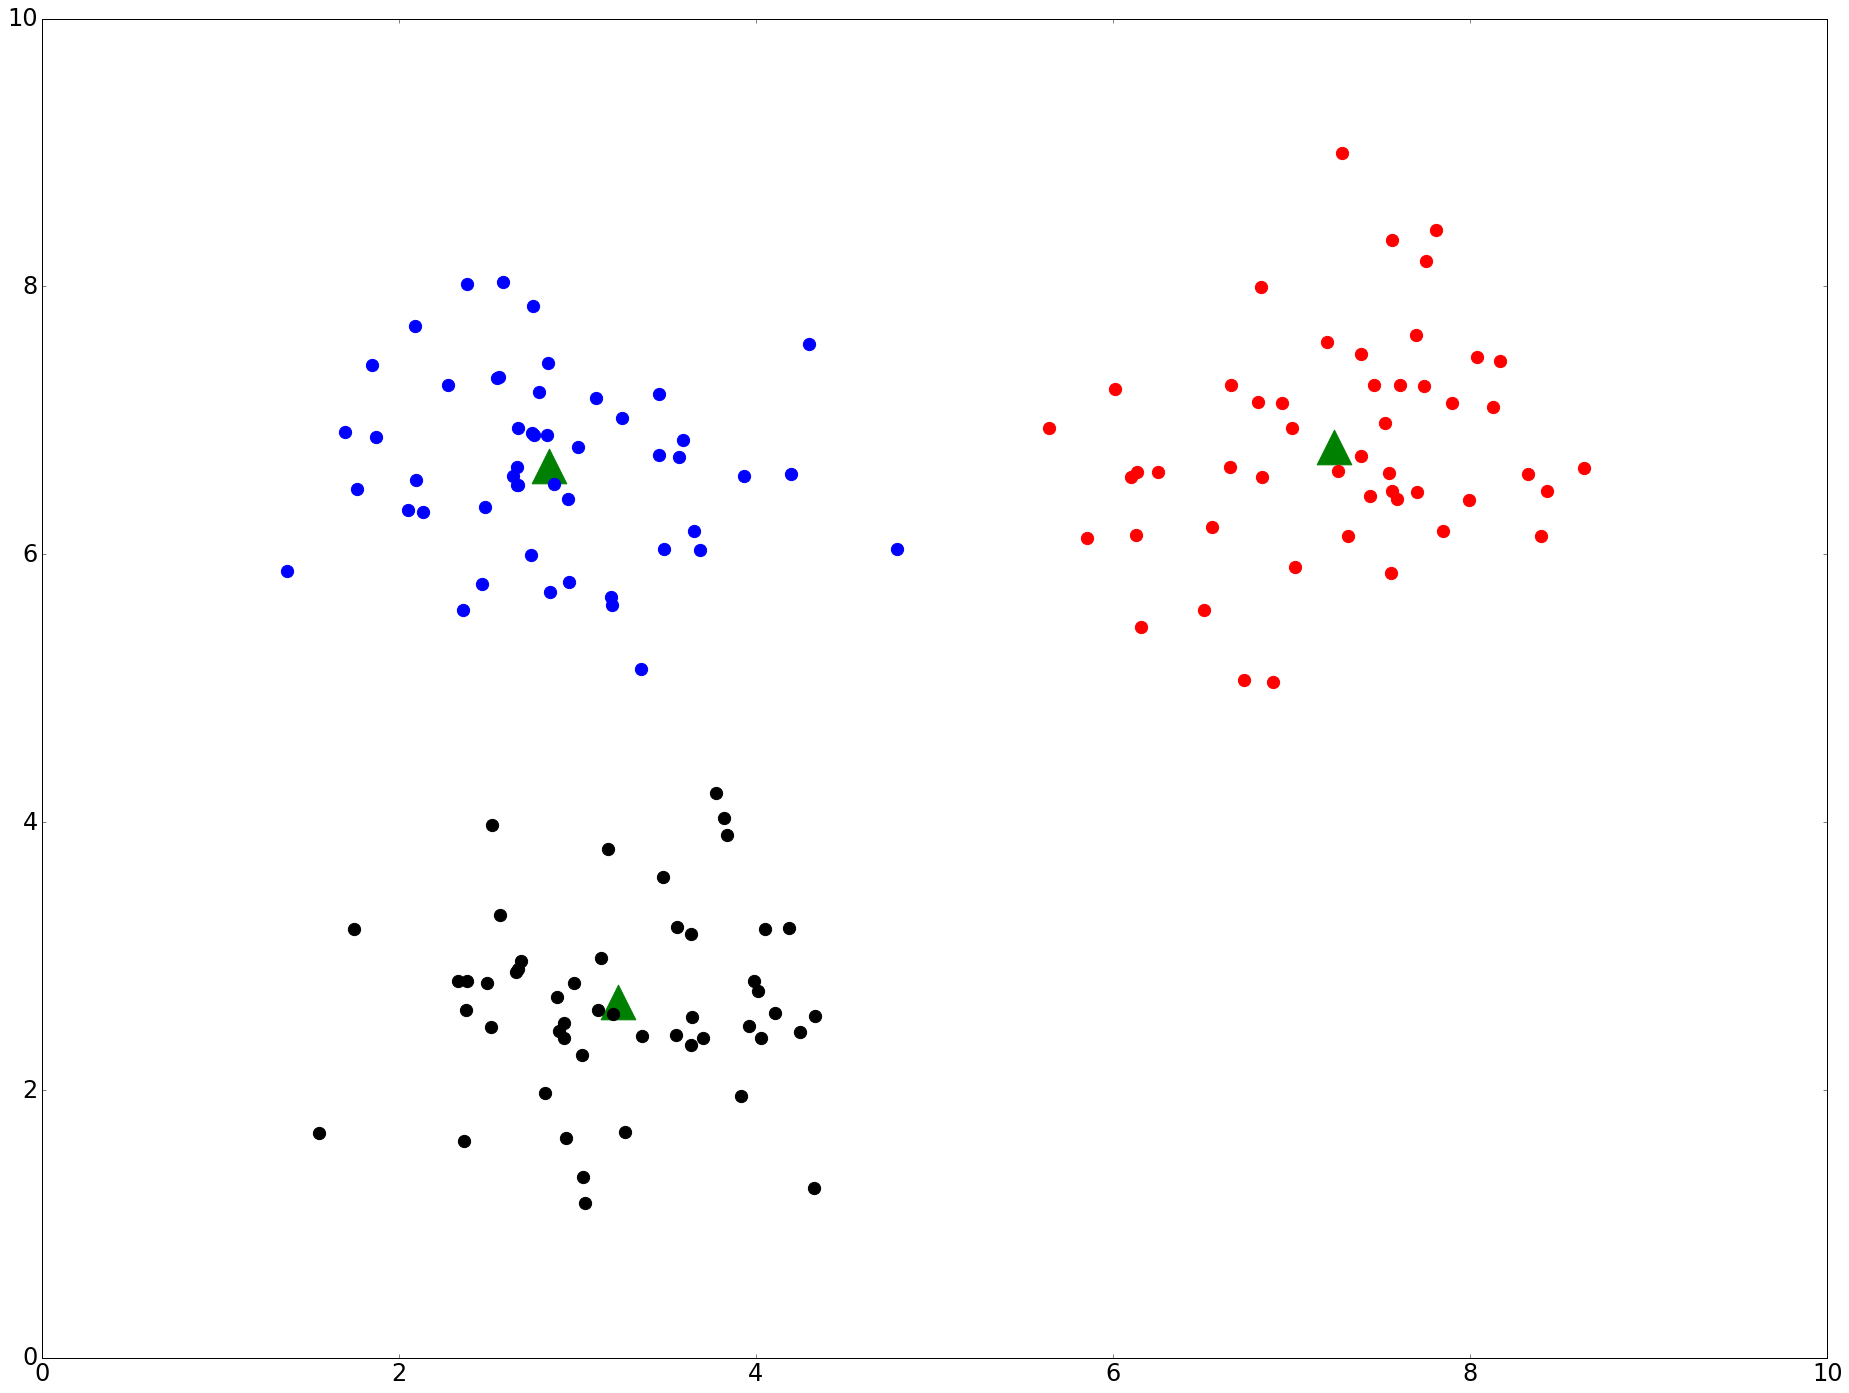

In [10]:
def kmeans(Data, NClusters):
  km = KMeans(NClusters)
  fitted = km.fit(Data)
  return (fitted.cluster_centers_, fitted.labels_, fitted.inertia_)

feature1 = 0
feature2 = 2

sizeTrain    = 150
sizeTest     = 1200
sizeCentroid = 1200

newTrain = train[:,[feature1, feature2]]

centers, labels, interia = kmeans(newTrain, 3)

label0 = np.where(labels == 0)
label1 = np.where(labels == 1)
label2 = np.where(labels == 2)

class0 = train[label0]
class1 = train[label1]
class2 = train[label2]

newClass0 = np.matrix(class0[:,[feature1, feature2]])
newClass1 = np.matrix(class1[:,[feature1, feature2]])
newClass2 = np.matrix(class2[:,[feature1, feature2]])

fig = plt.figure()

ax0 = fig.add_subplot(111)
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)

ax0.scatter(centers[:,0], centers[:,1], marker='^', s=sizeCentroid, color='green')

ax1.scatter(newClass0[:,0], newClass0[:,1], marker='o', color='red', s=sizeTrain)
ax2.scatter(newClass1[:,0], newClass1[:,1], marker='o', color='black', s=sizeTrain)
ax3.scatter(newClass2[:,0], newClass2[:,1], marker='o', color='blue', s=sizeTrain)

pylab.ylim([0,10])
pylab.xlim([0,10])

plt.show()